# HW3: Линейная регрессия на Scala

Описание работы и критериев оценивания  
В рамках данного домашнего задания предлагается реализовать алгоритм линейной регрессии на Scala с использованием
библиотеки Breeze.  
Решение можно оформить в одном из двух вариантов:  
- в виде ноутбука на Scala (75 баллов)  
- в виде полноценного проекта на Scala (100 баллов)
  Решение должно принимать на вход тренировочные и тестовые данные в виде файлов. Выход решения - предсказание модели
  предлагается также реализовать через файл. В процессе обучения модели рекомендуется организовать валидацию и
  сохранять вывод ее результатов.  
  В выборе данных и формате датасета не ограничиваем, можно взять простой вариант с 3-4 числовыми фичами.
  Решение, данные, результат работы алгоритма и вывод валидации добавить в репозиторий на github и прислать ссылку в
  интерфейсе MADE.  
  Бонусы и штрафы:  
  ● 100% за плагиат в решениях (всем участникам процесса)  
  ● 30% за посылку решения в течение недели после deadline  
  ● 10% за несоответствие правилам оформления задачи  
  

Данный ноутбук использовался для генерации данных:

In [60]:
import math
import numpy as np
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import pandas as pd 

In [16]:
TRAIN_PART = 0.8
N_FEATURES = 4
BIAS = 200.0

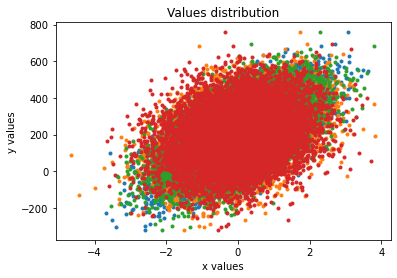

In [17]:
x, y, coef = datasets.make_regression(
    n_samples=10000,
    n_features=N_FEATURES,
    n_informative=N_FEATURES,
    noise=10,
    coef=True,
    bias=BIAS,
    random_state=0
)

# Scale feature x (years of experience) to range 0..20
#x = np.interp(x, (x.min(), x.max()), (0, 1))

# Scale target y (salary) to range 20000..150000 
#y = np.interp(y, (y.min(), y.max()), (0, 1))

plt.ion()
plt.plot(x,y,'.',label='training data')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Values distribution')

None

In [18]:
train_size = int(x.shape[0] * TRAIN_PART)

X_train = x[:train_size]
X_test = x[train_size:]
Y_train = y[:train_size]
Y_test = y[train_size:]

In [19]:
train_data = np.append(X_train, np.expand_dims(Y_train, axis=1), axis=1) 
test_data = np.append(X_test, np.expand_dims(Y_test, axis=1), axis=1) 

Сохраняем сгенерированные данные:

In [20]:
pd.DataFrame(train_data).to_csv("./data/train.csv", header=False, index=False)
pd.DataFrame(test_data).to_csv("./data/test.csv", header=False, index=False)

Для запуска линейной регресси на скале:
```  
sbt > run -tr ./data/train.csv --test_path ./data/test.csv -r ./data/result.csv
```
Параметры:
```    
App for Linear regression. Parameters:
--train_path, -tr - path to train dataset file in csv format (with doubles only)
--test_path, -ts - path to test data file in csv format (with doubles only); if it provides target column too - RMSE will be calculated
--result_path, -r - path for saving predictions vector
--learning_rate, -lr - regression learning rate, default is 0.1
--iterations_num, -i - number of regression steps, default value is 1000
```

Вывод программки:
```
Score RMSE: 9.947487610706341
Weights: 95.99130386626102, 56.14822089970876, 81.70602147819217, 33.90383322177734
Bias: 199.94309577744153
```

Можно заметить, что полученные значения довольно близки

In [31]:
resultDf = pd.read_csv("./data/result.csv", header=None)
Y_pred = resultDf[0].to_numpy()

resultDf.head()

,0
0,227.976950
1,168.131447
2,-100.928303
3,-101.677870
4,247.485594


Сравним результаты работы с истинными значениями коэффициентов.  
Вывод программки:
```
Score RMSE: 9.947487610706341
Weights: 95.99130386626102, 56.14822089970876, 81.70602147819217, 33.90383322177734
Bias: 199.94309577744153
```

In [65]:
print("Score RMSE: {}".format(math.sqrt(mean_squared_error(Y_test, Y_pred))))
print("Weights: {}".format(" ".join(np.char.mod('%f', coef))))
print("Bias: {}".format(BIAS))

Score RMSE: 9.947487610706336
Weights: 96.126339 56.063498 81.675645 34.083171
Bias: 200.0


Можно заметить, что полученные значения довольно близки